AttributeError: 'int' object has no attribute 'append'

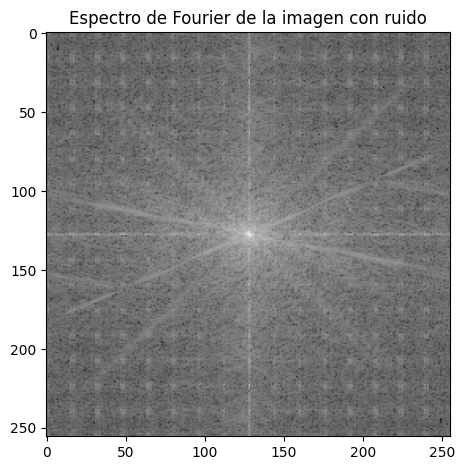

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Codigo casaco del profesor
def btw_pts(x,y,M,N,n,fc):
# Aplicacion del filtro Butterworth
# en una posicion especifica

# x: posicion en x (fila)
# y: posicion en y (columna)
# M: filas de la imagen
# N: columnas de la imagen
# n: orden del filtro
# fc: frecuencia de corte
# Calculo de la malla

    vx=np.linspace(-M/2, M/2, M)
    vy=np.linspace(-N/2, N/2, N)
    U,V=np.meshgrid(vy,vx)
    f= np.sqrt(U**2+V**2)

    T=np.ones([M,N])
    # para cada punto de la lista
    print(len(x))
    for i in range(0, len(x)):

        #filtro de butterworth centrado
        H =1- 1/(1+ (f/fc)**(2*n))

        # Movemos el punto del centro
        # a la posicion deseada
        a= x[i]- M/2
        b= y[i]- N/2
        H = np.roll(H, int(a), axis=0)
        H = np.roll(H, int(b), axis=1)

        T= T*H

    #Convertimos el filtro
    res= T 
    return (res)

# Cargamos la imagen y calculamos el espectro
img_path = 'cameraman.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
m, n = img.shape

# Adding noise at intervals of 15 pixels
delta = 15
V = np.fix(np.linspace(delta, m - delta, delta)).astype('uint8')
img[V, :] = img[V, :] + 50
img[:, V] = img[:, V] + 50

gray = cv2.normalize(img.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
m, n = gray.shape

F = np.fft.fft2(gray)
F_shift = np.fft.fftshift(F)

# Mostrar espectro de Fourier de la imagen con ruido
plt.figure(figsize=(24, 10))
plt.subplot(1, 4, 1)
plt.imshow(np.log(np.abs(F_shift)), cmap='gray')
plt.title('Espectro de Fourier de la imagen con ruido')

# Parametros de Butterworth
od = 5 # ajustar el orden del filtro
fc = 5 # ajustar la frecuencia de corte

def generate_coordinates(grid_size, separation, avoid_radius):
    x_coordinates = []
    y_coordinates = []
    center = grid_size // 2
    # Recorre las posiciones en cuadros de separacion
    for y in range(-grid_size // 2, grid_size // 2, separation):
        for x in range(-grid_size // 2, grid_size // 2, separation):
            if np.sqrt(x**2 + y**2) > avoid_radius:
                x_coordinates.append(x + center)
                y_coordinates.append(y + center)
    return x_coordinates, y_coordinates

# Uso de la función modificada
grid_size = 256
separation = 16
avoid_radius = 40  # Radio para evitar el centro
x, y = generate_coordinates(grid_size, separation, avoid_radius)

HB = btw_pts(x, y, m, n, od, fc)

# Mostrar filtro Butterworth
plt.subplot(1, 4, 2)
plt.imshow(HB, cmap='gray')
plt.title('Filtro Butterworth')

# Filtramos solo el ruido
ruido_freq = HB * F_shift

filtered_img = np.fft.ifft2(np.fft.ifftshift(ruido_freq)).real

# Mostrar imagen con solo frecuencias de ruido
plt.subplot(1, 4, 3)
plt.imshow(np.log(np.abs(ruido_freq)), cmap='gray')
plt.title('Convoluvion')
plt.subplot(1, 4, 4)
plt.imshow(filtered_img, cmap='gray')
plt.title('Imagen con solo frecuencias de ruido')


plt.show()



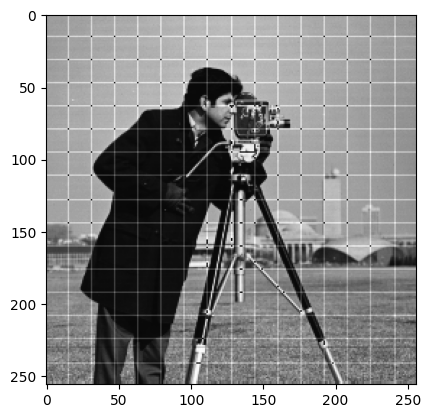

In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt     
 
img = cv2.imread('cameraman.png',cv2.IMREAD_GRAYSCALE) 
m = img.shape[0] 
delta = 15 
V = np.fix(np.linspace(delta,m-delta,delta)).astype('uint8') 
 
img[V,:] = img[V,:]+50 
img[:,V] = img[:,V]+50 
plt.imshow(img, cmap='gray') 
plt.show() 


In [ ]:
def generate_coordinates(grid_size, separation, avoid_radius):
    x_coordinates = []
    y_coordinates = []
    center = grid_size // 2
    for y in range(-grid_size // 2, grid_size // 2, separation):
        for x in range(-grid_size // 2, grid_size // 2, separation):
            if np.sqrt(x**2 + y**2) > avoid_radius:
                x_coordinates.append(x + center)
                y_coordinates.append(y + center)
    return np.array(x_coordinates), np.array(y_coordinates)

def filtro_butterworth(img, fc, N, tipo):
    grid_size = img.shape[0]
    separation = 16
    avoid_radius = 40  # Radio para evitar el centro
    x, y = generate_coordinates(grid_size, separation, avoid_radius)
    X, Y = np.meshgrid(x, y)

    if tipo == 'bajos':
        Z = 1 / (1 + (np.power(np.sqrt(np.power(X, 2) + np.power(Y, 2)) / fc, 2 * N)))
    elif tipo == 'altos':
        Z = 1 - 1 / (1 + (np.power(np.sqrt(np.power(X, 2) + np.power(Y, 2)) / fc, 2 * N)))
    else:
        raise ValueError("El tipo debe ser 'bajos' o 'altos'")

    # Asegurarse de que Z tiene el tamaño correcto
    Z = Z[:grid_size, :grid_size]

    F = np.fft.fft2(img)
    FS = np.fft.fftshift(F)

    BF = Z * FS

    S = np.fft.ifft2(np.fft.fftshift(BF))
    out = cv2.normalize(abs(S), None, 0.0, 1.0, cv2.NORM_MINMAX)

    return out


plt.imshow(filtro_butterworth(img,28,28,"bajos"),cmap="gray")
plt.title("")
plt.show()
plt.imshow(filtro_butterworth(img,28,28,"altos"),cmap="gray")
plt.show()

ValueError: operands could not be broadcast together with shapes (235,235) (256,256) 